## Fake News Detection

#### Import library

In [33]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# !pip install pandas     # download and install pandas library

In [35]:
df = pd.read_csv("news.csv")

In [36]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [37]:
df.shape

(6335, 4)

In [38]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [39]:
labels = df.label

In [40]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

<AxesSubplot:>

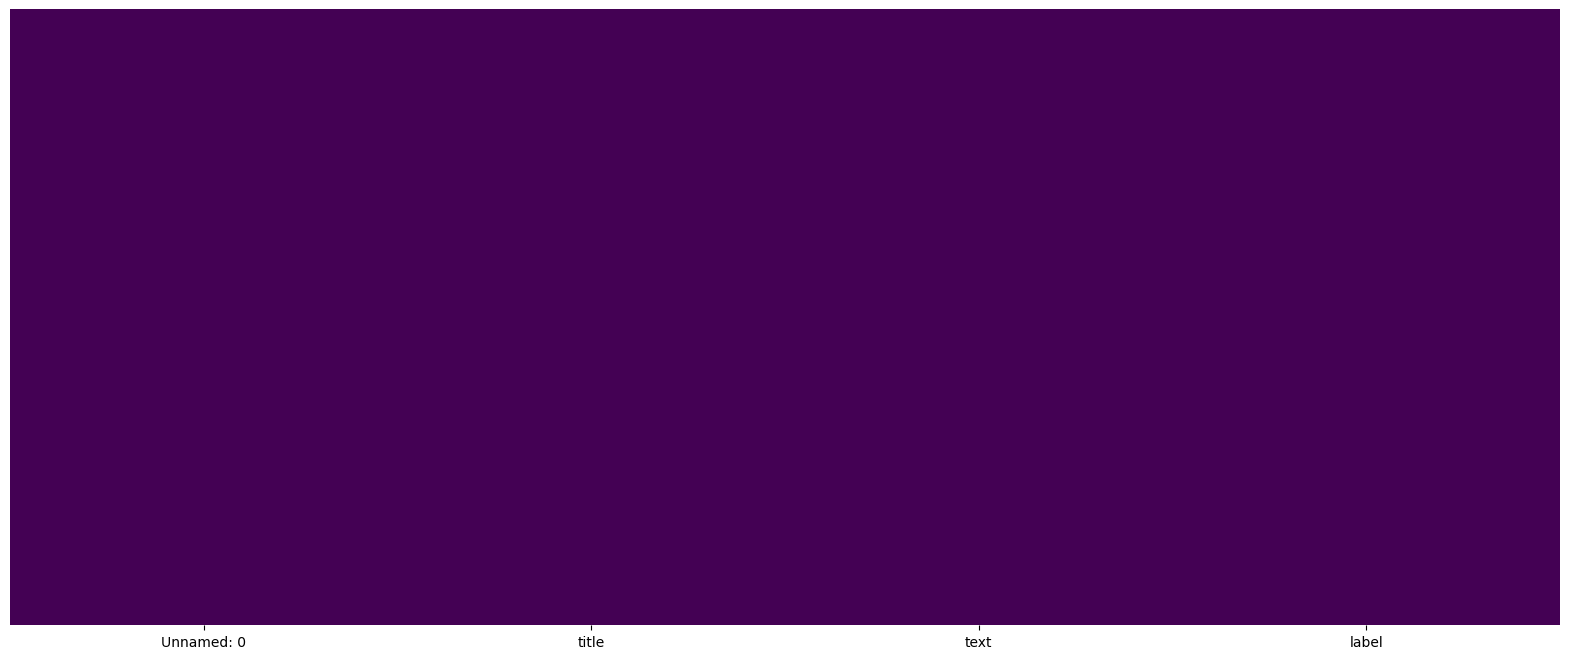

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),  yticklabels = False,cbar = False, cmap = 'viridis')

#found no null values in the dataset

<AxesSubplot:xlabel='label', ylabel='count'>

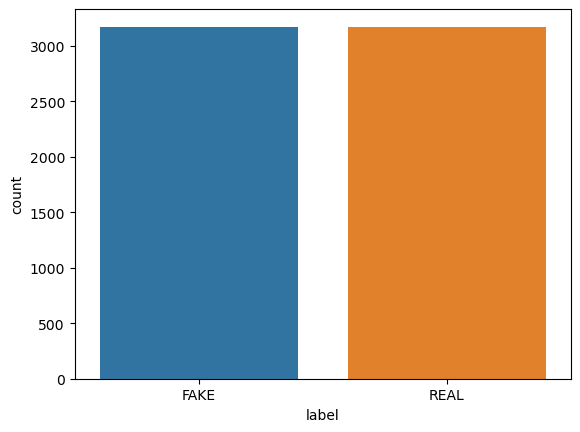

In [42]:
sns.countplot(x=df["label"])
# cheking the dataset whether it is imbalance or not
# the dataset is well balanced

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2, random_state = 20)

In [45]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [47]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [48]:
# fit and tranform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [49]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [50]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [51]:
score = accuracy_score(y_test, y_pred)

In [52]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.87%


In [53]:
# confusion metrics
cmpac = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

<AxesSubplot:>

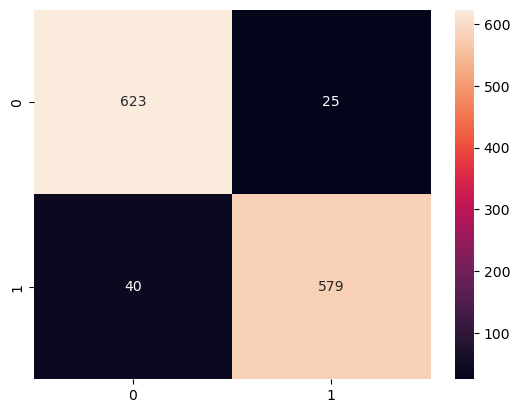

In [54]:
sns.heatmap(cmpac, annot= True,fmt='d')

<h3>Multinomial NB</h3>


In [55]:
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
modelNB.fit(tf_train, y_train)

MultinomialNB()

In [56]:
y_pred = modelNB.predict(tf_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm_MNB = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.8232044198895028


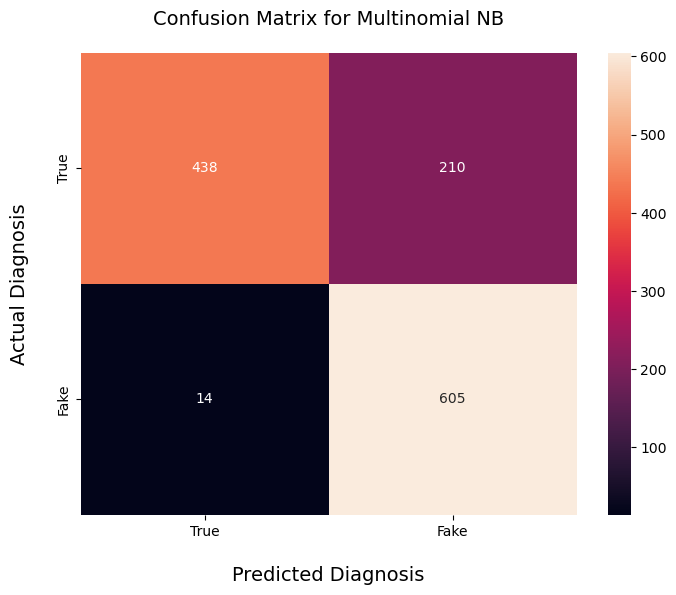

In [58]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
# sns.set(font_scale = 1.1)
ax = sns.heatmap(cm_MNB, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['True','Fake'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['True', 'Fake'])

# set plot title
ax.set_title("Confusion Matrix for Multinomial NB", fontsize=14, pad=20)

plt.show()

<h3>SVM</h3>

In [59]:
from sklearn import svm

In [60]:
ModelSVM = svm.LinearSVC(C = 1)
ModelSVM.fit(tf_train, y_train)
y_pred_SVM = ModelSVM.predict(tf_test)

print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

        FAKE       0.93      0.97      0.95       648
        REAL       0.97      0.93      0.95       619

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [61]:
cm_SVM= confusion_matrix(y_test,y_pred_SVM)

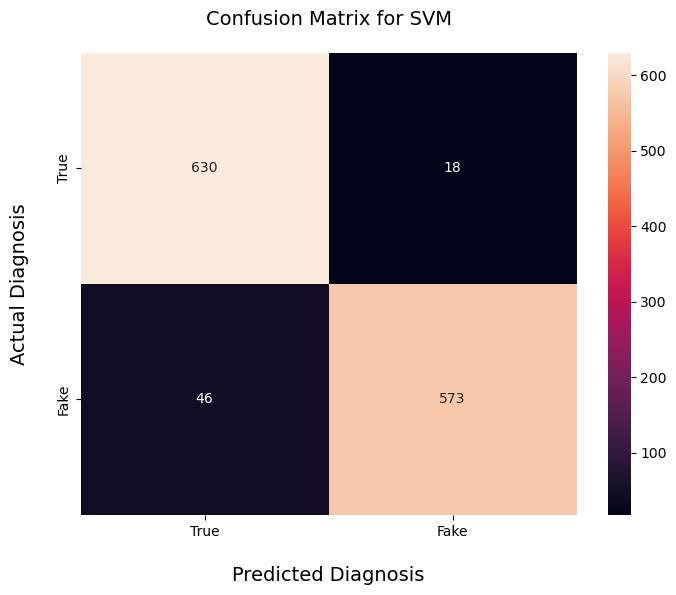

In [62]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
# sns.set(font_scale = 1.1)
ax = sns.heatmap(cm_SVM, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['True','Fake'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['True', 'Fake'])

# set plot title
ax.set_title("Confusion Matrix for SVM", fontsize=14, pad=20)

plt.show()

<h3>Logistic Regression</h3>

In [63]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(tf_train,y_train)

LogisticRegression()

In [64]:
y_pred_log = logmodel.predict(tf_test)


In [65]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

        FAKE       0.90      0.96      0.93       648
        REAL       0.95      0.89      0.92       619

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [66]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[619,  29],
       [ 69, 550]], dtype=int64)

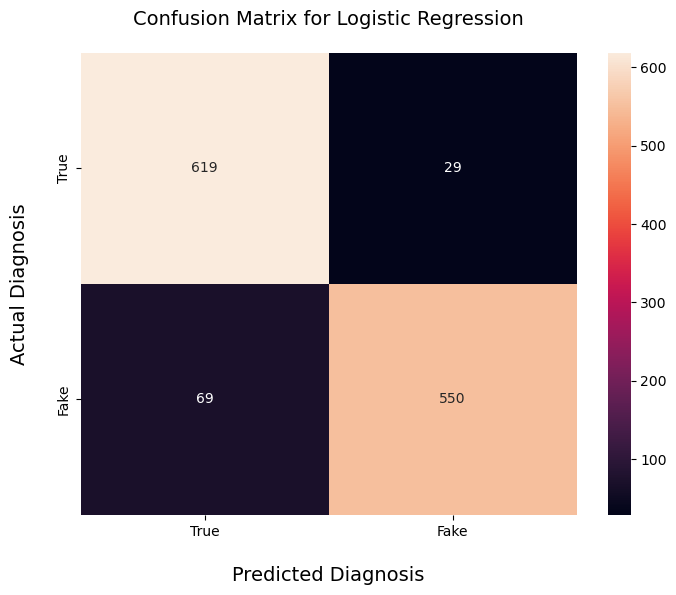

In [68]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
# sns.set(font_scale = 1.1)
ax = sns.heatmap(cm_log, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['True','Fake'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['True', 'Fake'])

# set plot title
ax.set_title("Confusion Matrix for Logistic Regression", fontsize=14, pad=20)

plt.show()

In [ ]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))

In [ ]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))

Saving Models


In [ ]:
filename = 'model2.pkl'
pickle.dump(modelNB, open(filename, 'wb'))

In [ ]:
filename = 'model3.pkl'
pickle.dump(ModelSVM, open(filename, 'wb'))

In [ ]:
filename = 'model4.pkl'
pickle.dump(logmodel, open(filename, 'wb'))